SNo    State                               Indian-Confirmed(Including Foreign Confirmed)  Cured    Death
-----  --------------------------------  -----------------------------------------------  -------  -------
1      Andaman and Nicobar Islands                                                    33  33       0
2      Andhra Pradesh                                                               3171  2057     58
3      Arunachal Pradesh                                                               2  1        0
4      Assam                                                                         781  87       4
5      Bihar                                                                        3061  1083     15
6      Chandigarh                                                                    279  187      4
7      Chhattisgarh                                                                  369  83       0
8      Dadar Nagar Haveli                                                      

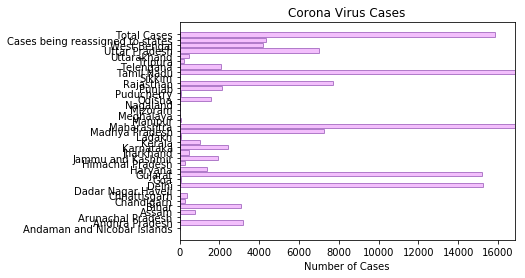

In [2]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import os
import numpy as np
import matplotlib.pyplot as plt
 
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]  
URL = 'https://www.mohfw.gov.in/'
   
SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed(Including Foreign Confirmed)','Cured','Death']  
   
response = requests.get(URL).content  
soup = BeautifulSoup(response, 'html.parser')  
header = extract_contents(soup.tr.find_all('th'))  
 
stats = []  
all_rows = soup.find_all('tr')  
 
for row in all_rows:  
    stat = extract_contents(row.find_all('td'))  
     
    if stat:  
        if len(stat) == 4:  
            # last row  
            stat = ['', *stat]  
            stats.append(stat)  
        elif len(stat) == 5:  
            stats.append(stat)  
 
stats[-1][0] = len(stats)  
stats[-1][1] = "Total Cases"  
    
objects = []
for row in stats :
 objects.append(row[1])

y_pos = np.arange(len(objects))

performance = []
for row in stats[:len(stats)-1] :
 performance.append(int(row[2]))

performance.append(int(stats[-1][2][:len(stats[-1][2])-1]))

table = tabulate(stats, headers=SHORT_HEADERS)
print(table)

plt.barh(y_pos, performance, align='center', alpha=0.5,
color=(234/256.0, 128/256.0, 252/256.0),
edgecolor=(106/256.0, 27/256.0, 154/256.0))

plt.yticks(y_pos, objects)
plt.xlim(1,performance[-1]+1000)
plt.xlabel('Number of Cases')
plt.title('Corona Virus Cases')
plt.show()